# SVM Implementation on wine dataset

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('winequalityN.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

# Null values imputation

In [5]:
# Fill numeric columns with mean (or median)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# Encoding of non numeric columns(type)

In [7]:
# Encoding 0 for red,1 for white
df['type'] = df['type'].map({'red': 0, 'white': 1})
df


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


In [32]:
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

<Axes: >

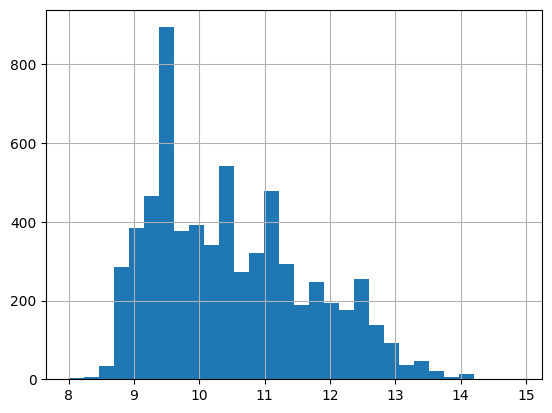

In [26]:
df['alcohol'].hist(bins=30)

In [25]:
df['alcohol'].value_counts()

alcohol
9.500000     367
9.400000     332
9.200000     271
10.000000    229
10.500000    227
            ... 
10.533333      1
11.366667      1
12.333333      1
14.050000      1
10.750000      1
Name: count, Length: 111, dtype: int64

# Identifying Outlyers

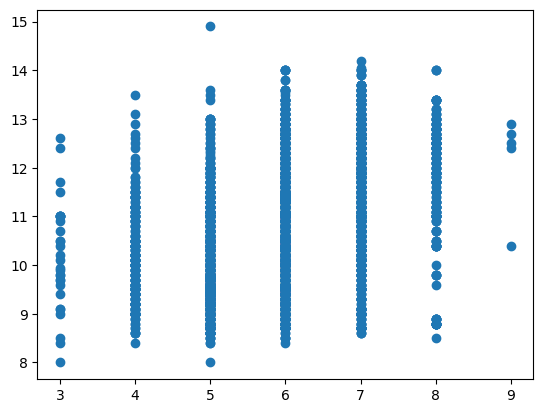

In [28]:
plt.scatter(df['quality'],df['alcohol'])
plt.show()

In [29]:
df.corr()['quality'] # Observing the corelation

type                    0.119323
fixed acidity          -0.076967
volatile acidity       -0.265838
citric acid             0.085699
residual sugar         -0.036819
chlorides              -0.200818
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019356
sulphates               0.038713
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

In [30]:
X = df.drop("quality",axis = 1)
y = df['quality']

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4872, 12)
(1625, 12)
(4872,)
(1625,)


# Creating Model no.1

In [39]:
model_1 = SVC(kernel = 'rbf', gamma = 0.1, C = 1,class_weight = 'balanced')
model_1.fit(X_train,y_train)
print('Accuracy of model 1 = ', model_1.score(X_test,y_test))

Accuracy of model 1 =  0.5089230769230769


In [38]:
model_1 = SVC(kernel = 'rbf', gamma = 10, C = 10,class_weight = 'balanced')
model_1.fit(X_train,y_train)
print('Accuracy of model 1 = ', model_1.score(X_test,y_test))

Accuracy of model 1 =  0.5963076923076923


# Creating Model 2

In [41]:
model_2 = SVC(kernel = 'poly', degree = 4, C = 10, class_weight = 'balanced')
model_2.fit(X_train,y_train)
print('Accuracy of model 2 = ', model_2.score(X_test,y_test))

Accuracy of model 2 =  0.16492307692307692


# Hyperparemeter tuning using GridSearchCV

In [42]:
params = {'kernel': ['rbf','poly','sigmoid'], 'C' : [0.1,1,10], 'degree' : [2,4], 'class_weight' :['balanced'], 'gamma' : [0.1,10]}

In [43]:
svm = GridSearchCV(SVC(), params, cv = 5)

In [ ]:
svm.fit(X_train,y_train)
print(svm.best_params_)
print(svm.best_score_)
best_model= svm.best_estimator_